<a href="https://colab.research.google.com/github/samuel1sm/Project_MPCE/blob/main/TestesFaceClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Preparação do ambiente*


In [156]:
pip install face_recognition

In [157]:
import os
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [158]:
 import shutil
 shutil.rmtree('/imgs', ignore_errors=True)

!ln -s "/content/gdrive/My Drive/Datasets/ProjetoMPCE/TestDataset" imgs
if not os.path.exists("dataset"):
  os.mkdir("dataset")

ln: failed to create symbolic link 'imgs/TestDataset': File exists


In [159]:
data7s = os.listdir("imgs/")
data7s = ['SortedImages.zip']

In [160]:
from zipfile import ZipFile

In [161]:
for i in data7s:
  with ZipFile(f"imgs/{i}", 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall("dataset/")

In [162]:
import glob 
images_path = glob.glob("dataset/*")


# *Codificando faces*




In [163]:
from imutils import paths
import face_recognition
import argparse
import pickle
import cv2
import os

In [164]:
print("[INFO] quantifying faces...")
imagePaths = images_path
detection_method = "cnn"
encondings_path = "encodings/"
data = []

if not os.path.exists(encondings_path):
  os.mkdir(encondings_path)

[INFO] quantifying faces...


In [165]:
for (i, imagePath) in enumerate(imagePaths):
	# load the input image and convert it from RGB (OpenCV ordering)
	# to dlib ordering (RGB)
  print("[INFO] processing image {}/{}".format(i + 1,
    len(imagePaths)))
  print(imagePath)
  image = cv2.imread(imagePath)
  rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  boxes = face_recognition.face_locations(rgb,  model=detection_method)

  encodings = face_recognition.face_encodings(rgb, boxes)
  # build a dictionary of the image path, bounding box location,
  # and facial encodings for the current image
  d = [{"imagePath": imagePath, "loc": box, "encoding": enc}
    for (box, enc) in zip(boxes, encodings)]
  data.extend(d)

[INFO] processing image 1/91
dataset/82.jpg
[INFO] processing image 2/91
dataset/7.jpg
[INFO] processing image 3/91
dataset/38.jpg
[INFO] processing image 4/91
dataset/20.jpg
[INFO] processing image 5/91
dataset/89.jpg
[INFO] processing image 6/91
dataset/49.jpg
[INFO] processing image 7/91
dataset/8.jpg
[INFO] processing image 8/91
dataset/47.jpg
[INFO] processing image 9/91
dataset/36.jpg
[INFO] processing image 10/91
dataset/31.jpg
[INFO] processing image 11/91
dataset/32.jpg
[INFO] processing image 12/91
dataset/11.jpg
[INFO] processing image 13/91
dataset/80.jpg
[INFO] processing image 14/91
dataset/44.jpg
[INFO] processing image 15/91
dataset/77.jpg
[INFO] processing image 16/91
dataset/70.jpg
[INFO] processing image 17/91
dataset/69.jpg
[INFO] processing image 18/91
dataset/59.jpg
[INFO] processing image 19/91
dataset/85.jpg
[INFO] processing image 20/91
dataset/86.jpg
[INFO] processing image 21/91
dataset/56.jpg
[INFO] processing image 22/91
dataset/45.jpg
[INFO] processing ima

In [166]:

# print("[INFO] serializing encodings...")
# f = open(f"{encondings_path}/encodings.pickle", "wb")
# f.write(pickle.dumps(data))
# f.close()

# *Clusterizando faces*


In [207]:
from sklearn.cluster import DBSCAN,KMeans
from imutils import build_montages
import numpy as np
import argparse
import pickle
import cv2
import pandas as pd

In [208]:
imagePaths = images_path
jobs = -1
detection_method = "cnn"
encondings_path = "encodings/encodings.pickle"

In [209]:
print("[INFO] loading encodings...")
# data = pickle.loads(open(encondings_path, "rb").read())
df = pd.DataFrame(data)
encodings =df["encoding"].values.tolist()

[INFO] loading encodings...


In [226]:
print("[INFO] clustering...")
# clt = DBSCAN(metric="euclidean", n_jobs=-1, min_samples = 5, )
# clt = KMeans(n_clusters=12, random_state=0)
# clt.fit(encodings)
# df["cluster"] = clt.labels_
# determine the total number of unique faces found in the dataset


[INFO] clustering...


In [335]:
def kmeans(numero_de_clusters, dados):
    modelo = KMeans(n_clusters=numero_de_clusters, random_state=0)
    modelo.fit(dados)
    return [numero_de_clusters,modelo.inertia_], modelo.labels_


max = 50
p1=np.array(kmeans(2, encodings)[0])
p2=np.array(kmeans(max, encodings)[0])



distance = 0
qtd_cluster = 0
# result_final = 0
finded_clusters = 0

# joelho =[]
# plt.figure(figsize=(18,10))
# x = [p1[0],p2[0]]
# y = [p1[1],p2[1]]
# plt.plot(x, y, c="r")
# x = []
# y = []

for i in range(2,max+1):

    result,clusters = kmeans(i, encodings)
    p3=np.array(result)
    d=np.cross(p2-p1,p3-p1)/np.linalg.norm(p2-p1)
    
    # joelho.append(result)
    # x.append(result[0])
    # y.append(result[1])
    # plt.plot(result[0],result[1], 'r*', c = 'b')

    if abs(d) > distance:
      distance = abs(d)
      qtd_cluster= i
      result_final = result
      finded_clusters = clusters

df["cluster"] = finded_clusters
print(qtd_cluster)
# plt.plot(p1[0],p1[1], 'r*', c = 'g')
# plt.plot(p2[0],p2[1], 'r*', c = 'g')
# plt.plot(result_final[0],result_final[1], 'r*', c = 'black')
# plt.plot(x, y)


13


# *Verificando Clusterização Imagens*


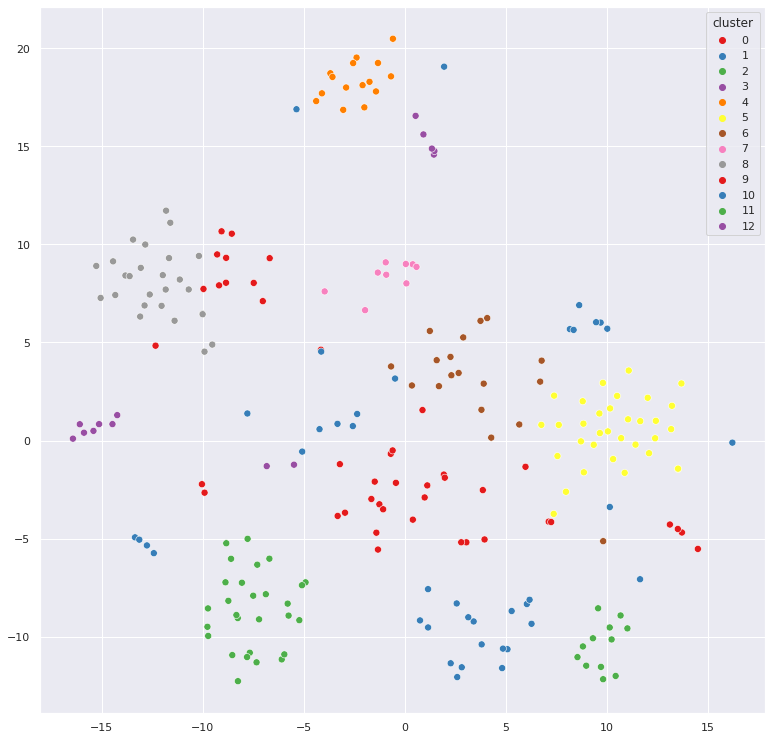

In [340]:
from sklearn.manifold import TSNE
tsne = TSNE()
visualizacao = tsne.fit_transform(encodings)
import seaborn as sns

sns.set(rc={'figure.figsize': (13, 13)})
# sns.set_style("whitegrid", {'axes.grid' : False})
sns.scatterplot(x=visualizacao[:, 0],
               y=visualizacao[:, 1],
               hue=df["cluster"],
               palette=sns.color_palette('Set1',qtd_cluster), s = 50)

# *Plotando Imagens*


In [329]:
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

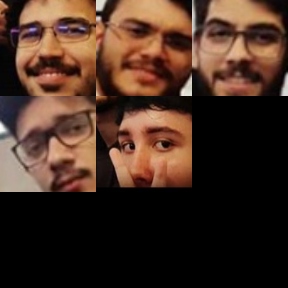

In [330]:
filtro = df[df["imagePath"] == "dataset/65.jpg"]

filtro.reset_index(inplace=True)
faces = []
for i,line in filtro.iterrows():
    image = cv2.imread(line["imagePath"])
    (top, right, bottom, left) = line["loc"]
    face = image[top:bottom, left:right]
    face = cv2.resize(face, (96, 96))
    faces.append(face)
  
montage = build_montages(faces, (96, 96), (3, 3))[0]
cv2_imshow(montage)


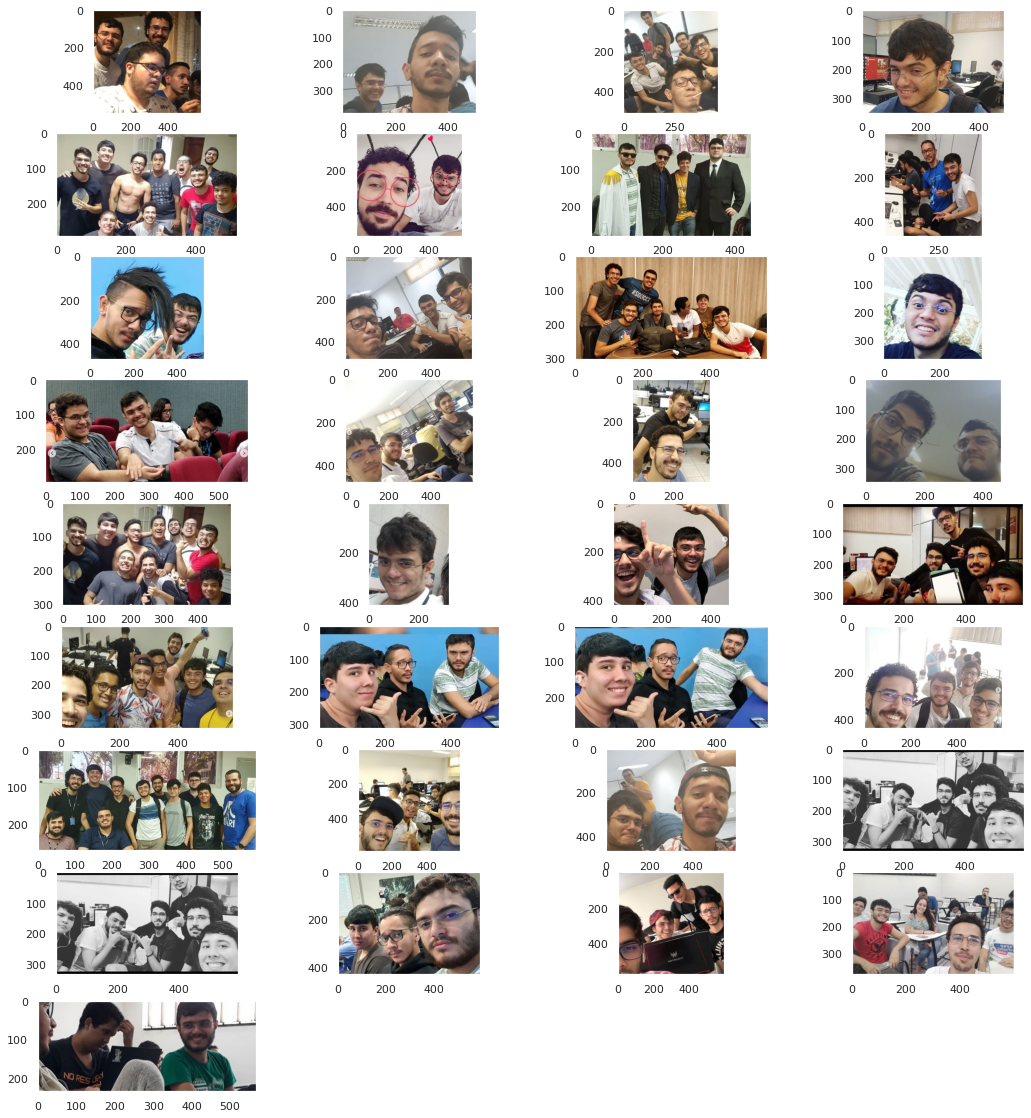

In [345]:
filtro = df[df["cluster"] == 5].copy()

filtro.reset_index(inplace=True)
plt.figure(figsize=(18,20))
plt.rcParams["axes.grid"] = False

columns = 4
for i,line in filtro.iterrows():
    
    plt.subplot(int(len(filtro)/columns)+1,columns,i+1)
    img = cv2.imread(line["imagePath"])
    # cv2_imshow(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
plt.show()

In [ ]:
clusters_list = [1,3]
filtro = df[df["cluster"].isin(clusters_list)].copy()
filtro= filtro.groupby("imagePath").filter(lambda x: True if len(x["cluster"].unique()) == len(clusters_list) else False)
filtro = filtro[files].drop_duplicates(subset=['imagePath']).copy()
filtro.reset_index(inplace=True)

plt.figure(figsize=(10,20))
columns = 2
for i,line in filtro.iterrows():
      
    plt.subplot(((int(len(filtro)) +1)/columns),columns,i+1)
    img = cv2.imread(line["imagePath"])
    # cv2_imshow(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img)
    plt.title(line["imagePath"])
plt.show()

[INFO] faces for face ID: 1


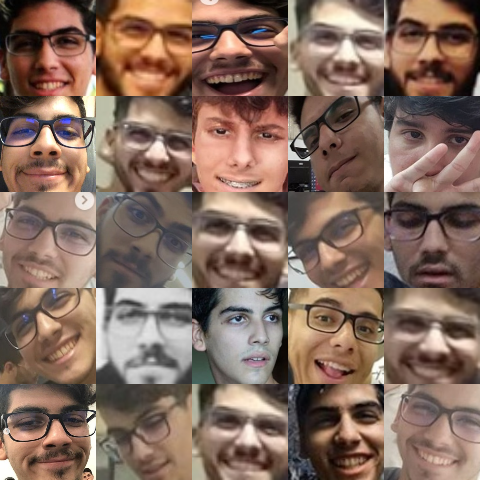

[INFO] faces for face ID: 4


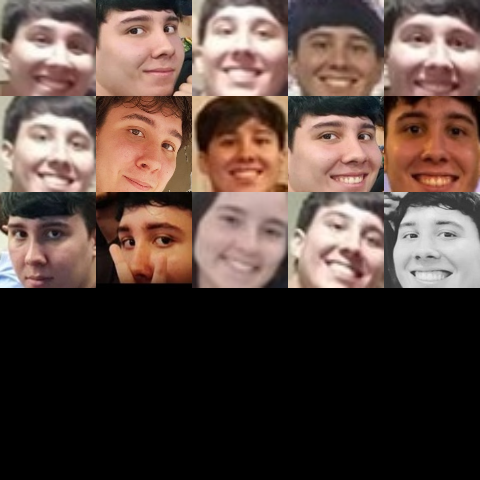

[INFO] faces for face ID: 2


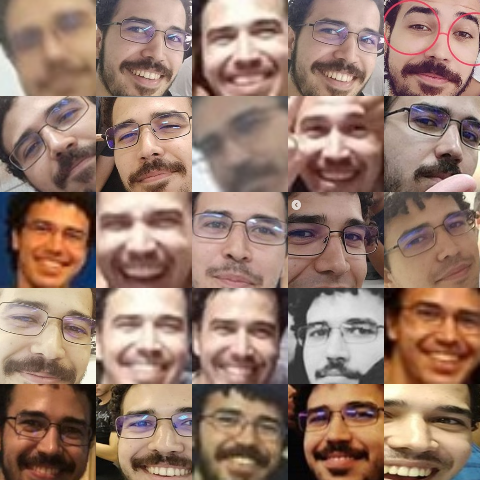

[INFO] faces for face ID: 12


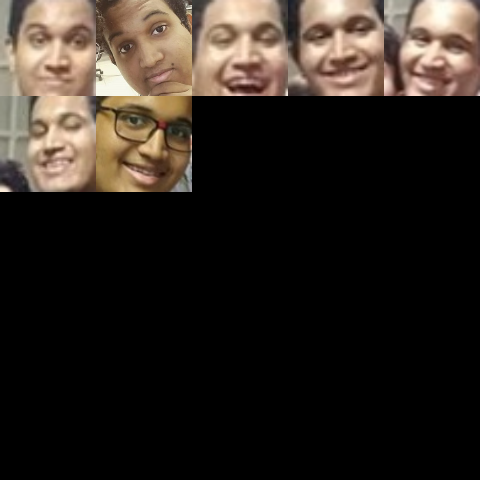

[INFO] faces for face ID: 8


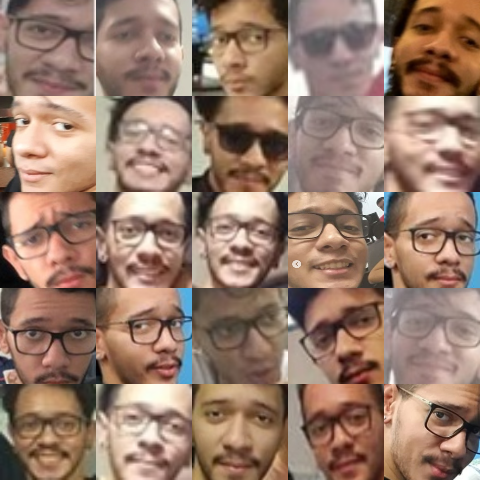

[INFO] faces for face ID: 3


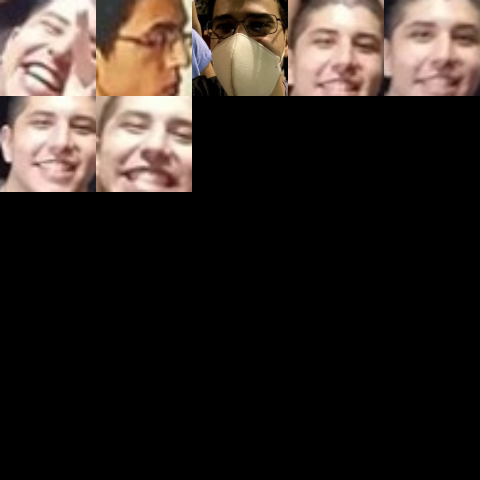

[INFO] faces for face ID: 9


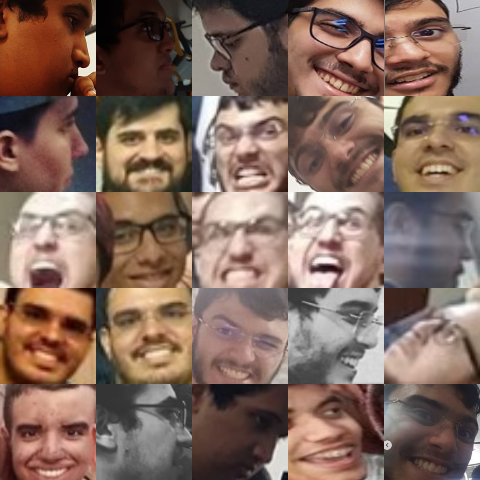

[INFO] faces for face ID: 7


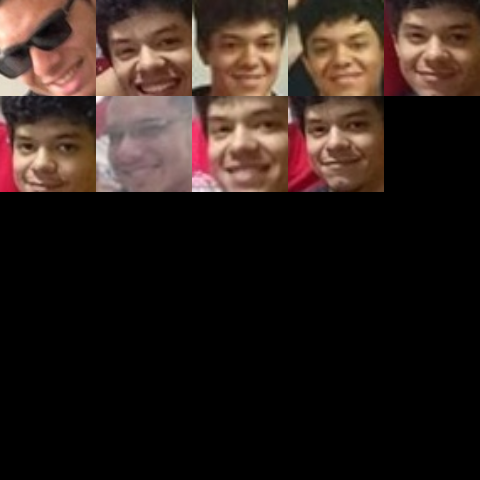

[INFO] faces for face ID: 11


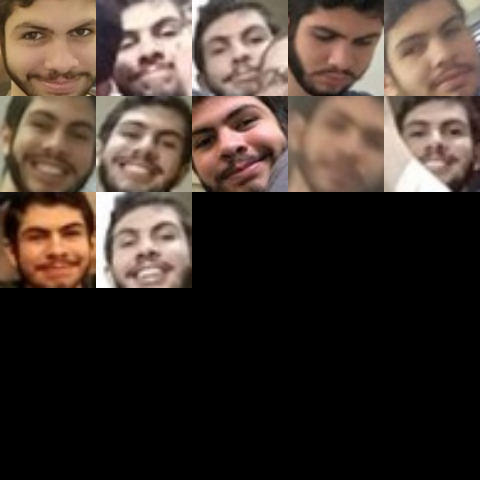

[INFO] faces for face ID: 6


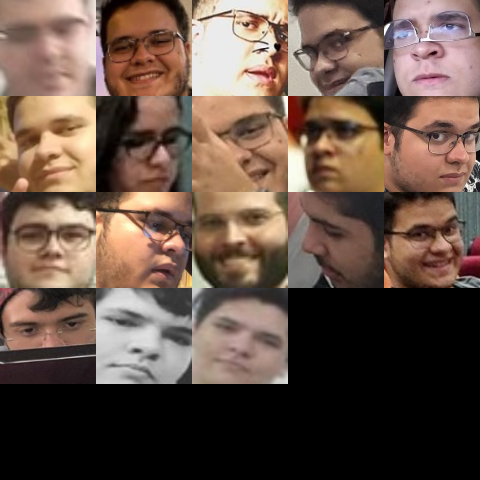

[INFO] faces for face ID: 5


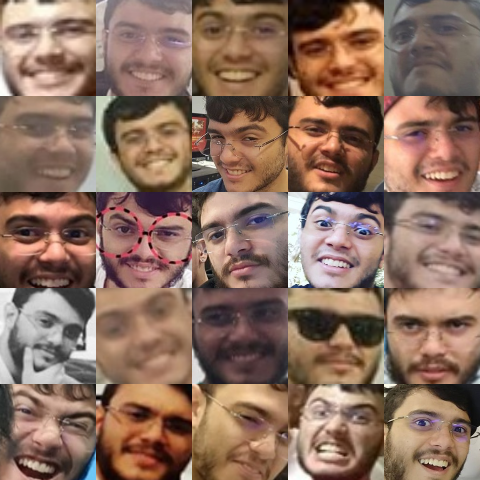

[INFO] faces for face ID: 0


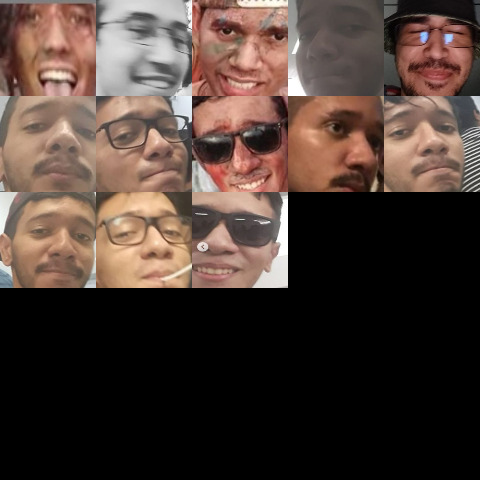

[INFO] faces for face ID: 10


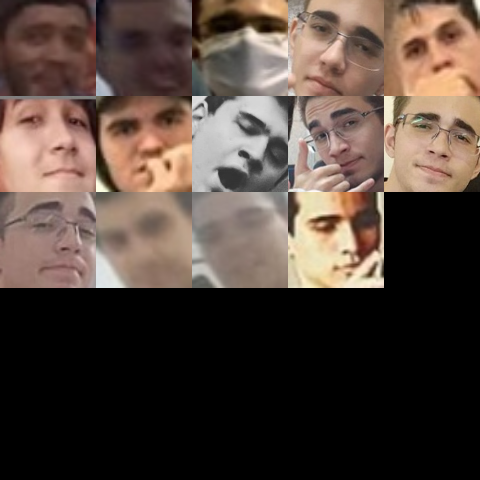

In [341]:
for labelID in df["cluster"].unique():
  print("[INFO] faces for face ID: {}".format(labelID))
  idxs = df[df["cluster"] == labelID]
  idx = idxs.sample(min(25, len(idxs)))

  faces = []
  for i,line in idx.iterrows():
    image = cv2.imread(line["imagePath"])
    (top, right, bottom, left) = line["loc"]
    face = image[top:bottom, left:right]
    face = cv2.resize(face, (96, 96))
    faces.append(face)

  montage = build_montages(faces, (96, 96), (5, 5))[0]

	# show the output montage
  title = "Face ID #{}".format(labelID)
  title = "Unknown Faces" if labelID == -1 else title
  cv2_imshow(montage)
